In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import rasterio
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/'
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20170401_clipped.tif'

# for f in sorted(glob.glob(os.path.join(path,'*.tif'))):
raster = io.imread(path)
print("raster shape",raster.shape)
# io.imshow(raster[:,:,0]) #snow depth, band1
# io.show()

# io.imshow(raster[:,:,1]) #alpha mask, band2
# io.show()
           

raster shape (16781, 17568, 2)


In [3]:
# convert to numpy array
array = np.array(raster[:,:,0]) #RAW array of lidar tif
print("array shape",array.shape)

array shape (16781, 17568)


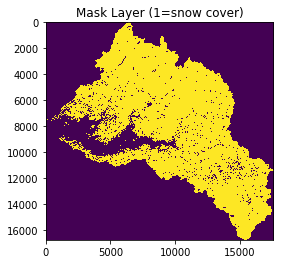

mean snow depth 0.37557194 meters
number pixels with snow cover 110721840.0
pixel size (x,y) =  2.9999758808137633 2.9999666816697763
Snow Covered Area (SCA) =  996477481.3264548 m^2
Snow Covered Area (SCA) =  996.4774813264547 km^2
% Basin snow cover 84.44724418020803 %


In [12]:
#Ernesto method....
# a=array.copy()
sno_mask = array.copy()
sno_mask[sno_mask > 0] = 1 #make SCA mask

#sno_mask is matrix of 0 (no snow) and 1's (snow)
plt.imshow(sno_mask,alpha=None)
plt.title('Mask Layer (1=snow cover)')
plt.show()

# meanSD -- caclulate mean snow depth (meanSD), without zero snow pixels
mu_sd = np.mean(sno_mask) #mean snow depth, from sca 
print("mean snow depth", mu_sd,'meters')


# SCA -- pixs snow cover * pixel size
num_pix = np.sum(sno_mask) #number of pixels with snow cover (sum the 1's)
print("number pixels with snow cover",num_pix)

ras =  rasterio.open(path) #CHAGE FOR LOOP
gt = ras.transform
pixelSizeX = gt[0]
pixelSizeY =-gt[4] #notice the -gt
print('pixel size (x,y) = ',pixelSizeX, pixelSizeY)

sca = num_pix * pixelSizeX * pixelSizeY
sca_km = sca/1000**2
p_basin = sca_km/1180 *100  #per Hedrick et al. 2018
print('Snow Covered Area (SCA) = ', sca, 'm^2')
print('Snow Covered Area (SCA) = ', sca_km, 'km^2')
print('% Basin snow cover', p_basin, '%')

In [13]:
pd.DataFrame(np.array([[mu_sd, sca_km, p_basin]]),columns=['meanSD','SCA (km)','% basin'])


,meanSD,SCA (km),% basin
0,0.375572,996.477481,84.447244
